For the second visualization, I decided to use excel. First I needed to clean up the data and prepare it to be plotted. The code that follows was used to do that.

The link to the dataset used is: https://open.toronto.ca/dataset/building-permits-active-permits/

In [ ]:
import pandas as pd
df = pd.read_csv("building-permits-active-permits.csv", low_memory=False) #import data


In [4]:
df['EST_CONST_COST_CLEAN'] = pd.to_numeric(
    df['EST_CONST_COST'].str.replace(r'[^0-9.]', '', regex=True),
    errors='coerce'
)
# The data in the EST_CONST_COST column contains data with commans, symbols, and/or missing values
# Cleaning the data removes non-numeric characters, makes sure the column is numeric, and replaces blanks with NaN

Next, I grouped and cleaned the data by permit type and calculated the mean.

In [5]:
cost_summary = (
    df.groupby('PERMIT_TYPE')['EST_CONST_COST_CLEAN']
    .mean()
    .reset_index()
    .dropna()
    .sort_values(by='EST_CONST_COST_CLEAN', ascending=False)
)
# This aggregates the cost by permit type, removes rows with missing 
# values, and sorts the output for easier visualization on Excel.

Now the cleaned data saved as a .csv file that can then be opened in Excel for visualization.

In [15]:
cost_summary.to_csv("permit_cost_by_type_Vis2.csv", index=False)



From the excel sheet the following plot was generated:

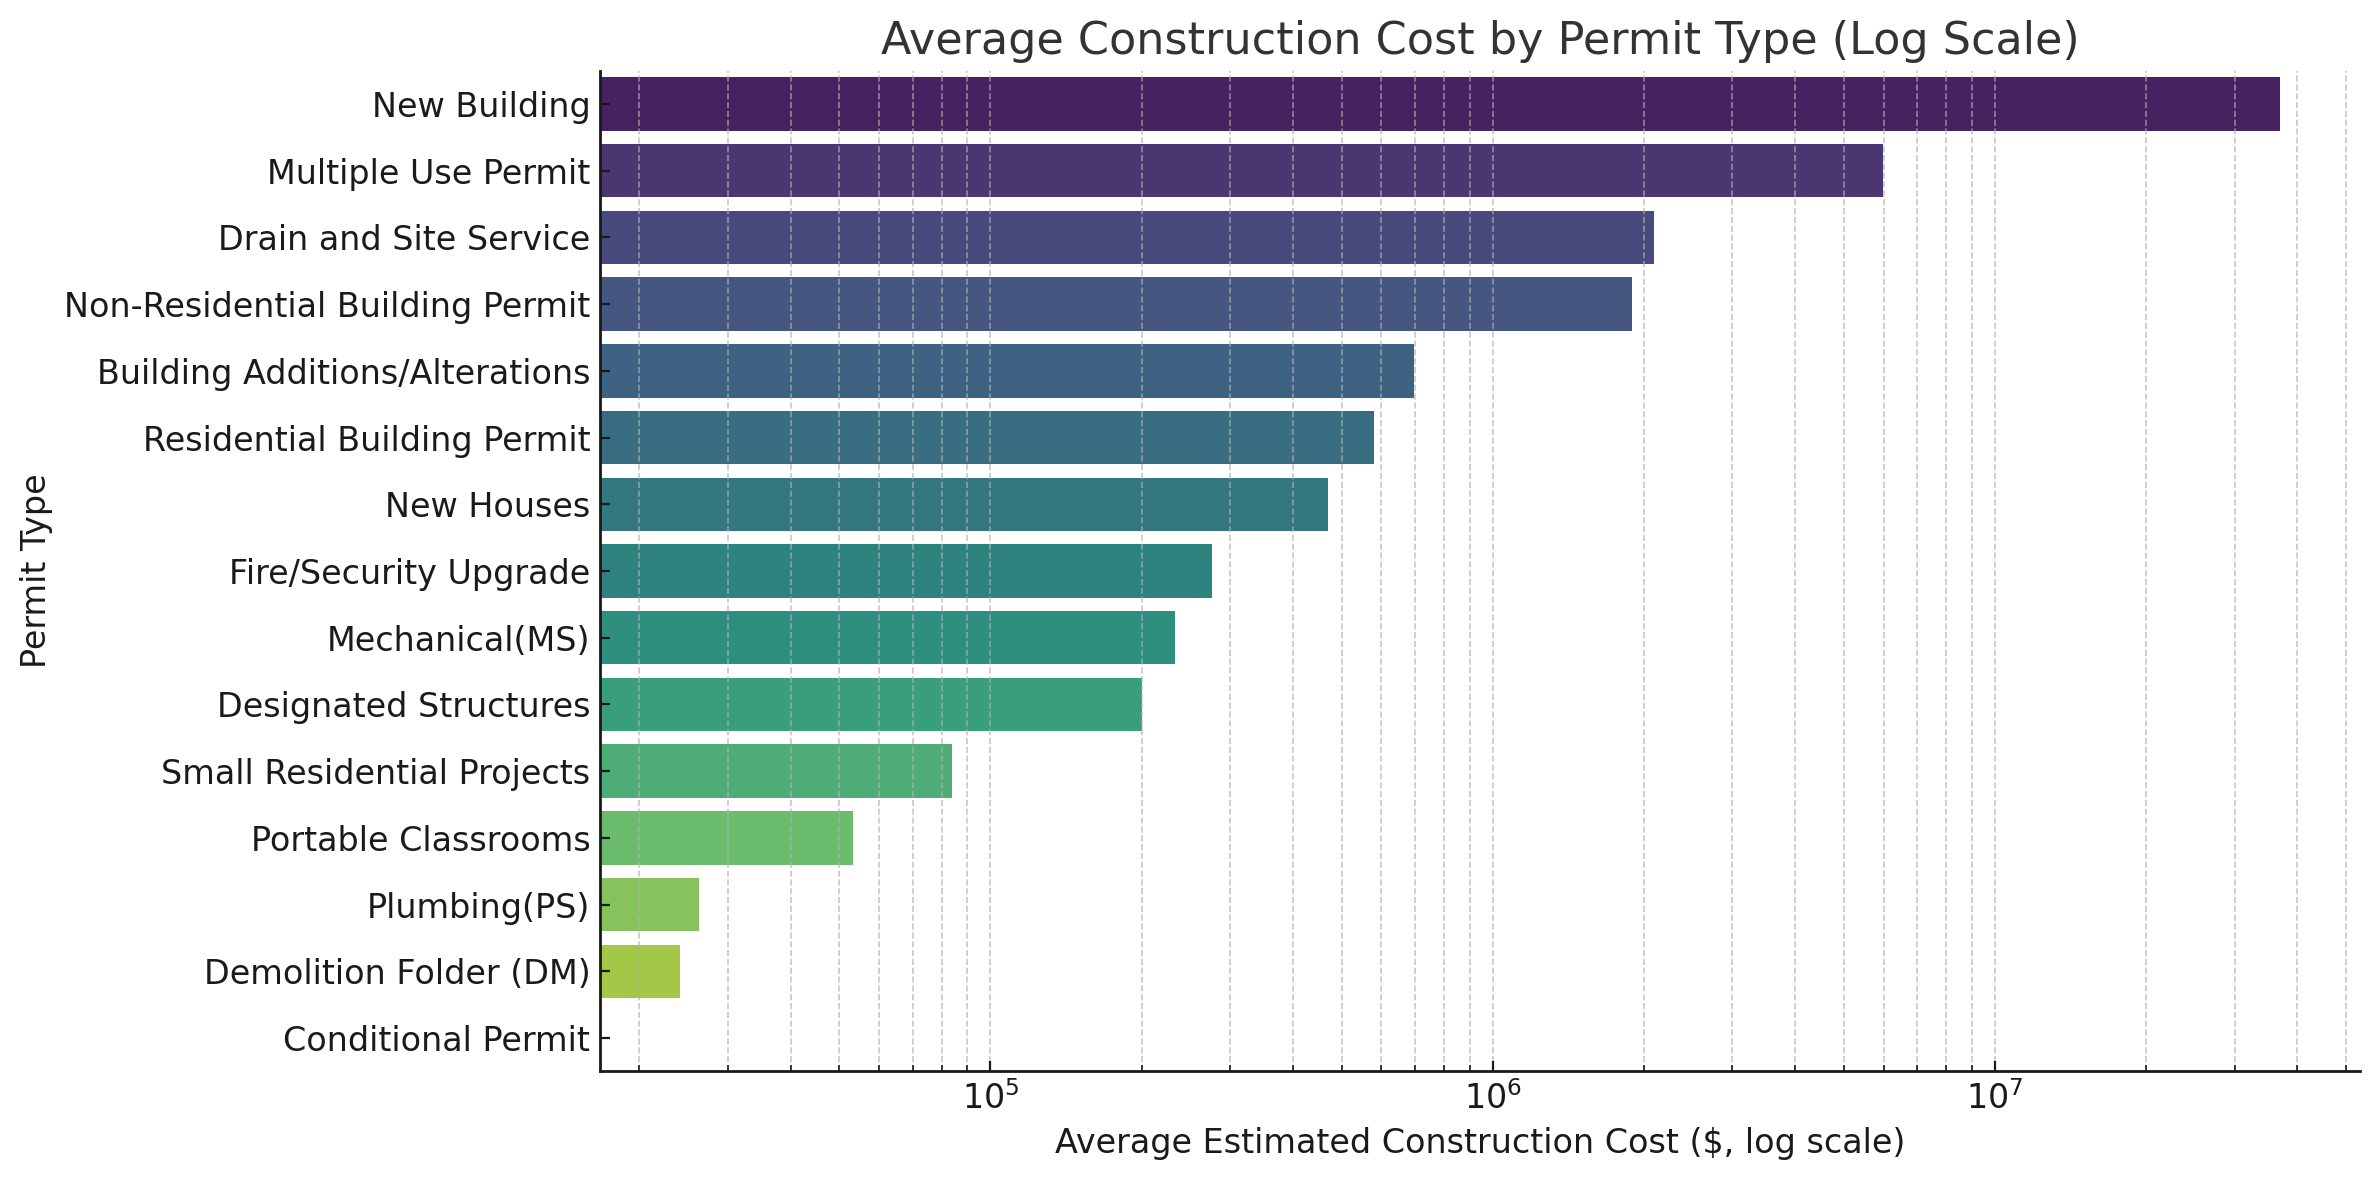

For each visualization, describe and justify:


What software did you use to create your data visualization?
I used python to clean the data and then Excel to generate the final visualization

Who is your intended audience?
This bar chart is targeted at city budget officers, developers, financial analysts, and infrastructure policy researchers who need to assess the average financial scale of different construction project types based on permits issued.

What information or message are you trying to convey with your visualization?
The chart is designed to convey the relative magnitude of average estimated construction costs by permit type. It allows the audience to quickly identify which types of permits are generally associated with the most expensive projects and which are typically more modest in scale.

What aspects of design did you consider when making your visualization? How did you apply them? With what elements of your plots?
A horizontal bar chart was chosen for space efficiency and ease of reading lengthy permit type labels. The data is sorted from highest to lowest average cost, allowing top categories to stand out clearly. A logarithmic x-axis was used to accommodate the large variance in cost data, and a sequential color gradient was applied to visually guide interpretation from lower to higher values.

How did you ensure that your data visualizations are reproducible? If the tool you used to make your data visualization is not reproducible, how will this impact your data visualization?
While Excel lacks built-in script-based reproducibility, the process can be replicated by following clear steps: aggregating the data, calculating average costs per permit type, and applying log scaling and sorting. Sharing the original spreadsheet and instructions can ensure that others can reproduce the chart.

How did you ensure that your data visualization is accessible?
The visualization includes clear axis labels and sufficiently contrasting colors for users with normal vision. Nonetheless, it could be improved further by including direct annotations for key values or alternate text descriptions if presented in a digital report.

Who are the individuals and communities who might be impacted by your visualization?
The chart supports decision-making for multiple stakeholders, such as city planners evaluating infrastructure investments, developers benchmarking project types, and taxpayers seeking accountability in municipal construction trends.

How did you choose which features of your chosen dataset to include or exclude from your visualization?
Only two fields were used—permit type and average estimated construction cost—to isolate the cost comparison and avoid visual complexity. This focus makes it easier to communicate which permit categories involve the highest resource commitments.

What ‘underwater labour’ contributed to your final data visualization product?
The most intensive work involved cleaning and standardizing cost entries, filtering out outliers and zero-cost permits, and validating data integrity. Additionally, it was necessary to handle missing or misclassified permit types and to test various axis transformations before settling on a log scale for optimal presentation.